In [1]:
# import library

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [42]:
# load image

image = cv2.imread('daun.jpg')

In [43]:
# convert image from BGR to RGB

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

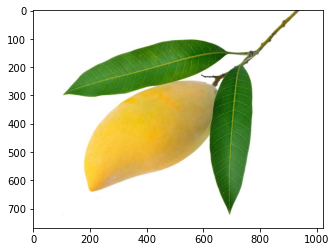

In [44]:
# show the image

plt.imshow(image)

In [45]:
print(image.dtype, image.shape)

uint8 (768, 1024, 3)


C:\Users\kelix\AppData\Local\Temp/ipykernel_5652/3962179051.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


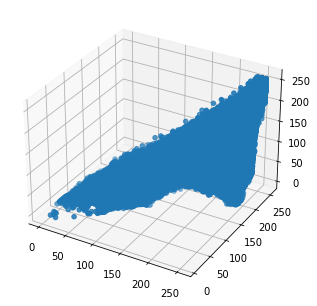

In [46]:
# showing the RGB color scatter

r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [47]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)

img1D = image.reshape((-1,3))

In [48]:
print(img1D.dtype, img1D.shape)

uint8 (786432, 3)


In [49]:
# Convert to float type

Z = np.float32(img1D)

In [50]:
print(Z.dtype, Z.shape)

float32 (786432, 3)


In [59]:
# define criteria, number of clusters(K) and apply kmeans() from 
# https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [60]:
# labelling

print(label)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [61]:
print(center)

[[255.49869  255.42471  254.67648 ]
 [138.57275  148.5978    46.956516]]


In [62]:
# back convert data into integer 8-bit values

center = np.uint8(center)
center

array([[255, 255, 254],
       [138, 148,  46]], dtype=uint8)

In [63]:
# back to cluster

segmented_data = center[label.flatten()]
segmented_data

array([[255, 255, 254],
       [255, 255, 254],
       [255, 255, 254],
       ...,
       [255, 255, 254],
       [255, 255, 254],
       [255, 255, 254]], dtype=uint8)

In [64]:
# reshape data into the original image dimensions

segmented_image = segmented_data.reshape((image.shape))
segmented_image

array([[[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       ...,

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]]

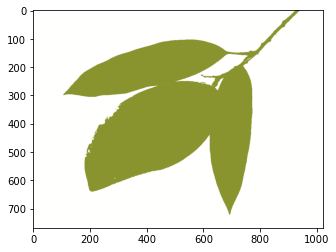

In [65]:
# visualize the segmented image

plt.imshow(segmented_image)